一、数据分析

892个训练样本（扣除表头），12个特征：
• Passengerld ：乘客的ID ，这是个顺序编号，唯一地标识一名乘客。
• Survived : 1表示幸存，0表示遇难。这个是我们的标注数据。
• Pclass ：仓位等级 是很重要的特征。看过电影的人都知道，高仓位等级的乘客更快地到达甲板，从而更容易获救。
• Name ：乘客名字，这个特征和幸存与否无关，我们会丢弃这个特征。
• Sex ：乘客性别，看过电影的人都知道，由于救生艇数量不够，船长让妇女和儿童先上救生艇。所以这也是个很重要的特征。
• Age ：乘客性别，儿童会优先上救生艇，身强力壮者幸存概率也会高一些。
• SibSp 兄弟姐妹同在船上的数量。
• Parch ：同船的父辈人员数量。
• Ticket 乘客票号。我们不使用这个特征。
• Fare ：乘客的体热指标。
• Cabin ：乘客所在的船舱号。实际上这个特征和幸存与否有一定的关系，比如最早被水淹没的船舱位置，其乘客的幸存概率要低一些。但由于这个特征有大量的的丢失数据，而且没有更多的数据来对船舱进行归类，因此我们丢弃这个特征的数据。
• Embarked ：乘客登船的港口。我们需要把港口数据转换为数值型数据。

我们需要加载 csv 数据，并做一些预处理，包括：
• 提取 Survived列的数据作为模型的标注数据。
• 丢弃不需要的特征数据。
• 对数据进行转换，以便模型处理。比如性别数据，我们需要转换为0和1。
·处理缺失数据。比如年龄这个特征,有很多缺失的数据。
pandas是完成这些任务的理想软件包。

In [47]:
#先把数据从文件里读取出来
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
#index_col=0表示以原有数据的第一列(索引为0)当作行索引
#data =  pd.read_csv('datasets/titanic/train.csv', index_col=0)
    #丢弃无用的数据
#data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
#data['Sex'] = (data['Sex'] == 'male').astype('int')
#labels = data['Embarked'].unique().tolist()
#labels
#data['Embarked'] 
#data['Embarked'] = data['Embarked'].apply(lambda n: labels.index(n)) #变成0 1 2 ..，用索引代替原来的值，应用在每一行
#data['Embarked'] 
#data.head()

#当我们要对数据框（DataFrame）的数据进行按行或按列操作时用apply()
#df1.apply(lambda x :x.max()-x.min(),axis=1)
#axis=1，表示按行对数据进行操作#从下面的结果可以看出，我们使用了apply函数之后，系统自动按行找最大值和最小值计算，每一行输出一个值


PassengerId
1      0
2      1
3      0
4      0
5      0
6      2
7      0
8      0
9      0
10     1
11     0
12     0
13     0
14     0
15     0
16     0
17     2
18     0
19     0
20     1
21     0
22     0
23     2
24     0
25     0
26     0
27     1
28     0
29     2
30     0
      ..
862    0
863    0
864    0
865    0
866    0
867    1
868    0
869    0
870    0
871    0
872    0
873    0
874    0
875    1
876    1
877    0
878    0
879    0
880    1
881    0
882    0
883    0
884    0
885    0
886    2
887    0
888    0
889    0
890    1
891    2
Name: Embarked, Length: 891, dtype: int64

In [48]:
def read_dataset(fname):
    #指定第一列作为行索引
    data =  pd.read_csv(fname, index_col=0)
    #丢弃无用的数据
    data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    #处理性别数据
    data['Sex'] = (data['Sex'] == 'male').astype('int')
    #处理登船港口数据
    labels = data['Embarked'].unique().tolist()
    data['Embarked'] = data['Embarked'].apply(lambda n: labels.index(n))
    #处理缺失数据
    data = data.fillna(0)
    return data

train = read_dataset('datasets/titanic/train.csv') #pandas.core.frame.DataFrame type(train)

In [4]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


二、训练模型

In [49]:
type(train['Survived']) #series 两个成分，一个index，一个values
type(train['Survived'].values) #ndarray数组
train['Survived'].values #一维数组
train.drop(['Survived'], axis=1).values.shape

(891, 7)

In [50]:
from sklearn.model_selection import train_test_split

y = train['Survived'].values
X = train.drop(['Survived'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('train dataset: {}; test dataset: {}'.format(
    X_train.shape, X_test.shape))

train dataset: (712, 7); test dataset: (179, 7)


In [51]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 0.9831460674157303; test score: 0.770949720670391


从上述结果可以看出，针对训练样本评分很高，针对测试数据集评分比较低，两者差距比较大（过拟合）
解决方法：剪枝（scikit-learn不支持后剪枝，但提供一系列的模型参数进行前剪枝）

In [52]:
from sklearn.tree import export_graphviz

with open("titanic1.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)

# 1. 在电脑上安装 graphviz
# 2. 运行 `dot -Tpng titanic.dot -o titanic.png` 
# 3. 在当前目录查看生成的决策树 titanic.png

三、参数模型优化

In [22]:
#参数选择max_depth，使用不同的模型深度训练模型， 并计算评分数据
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

In [23]:
depths = range(2, 15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

In [24]:
#找出测试数据集评分最高的索引
best_score_index = np.argmax(cv_scores) #找出最大值索引
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))


best param: 7; best score: 0.8324022346368715


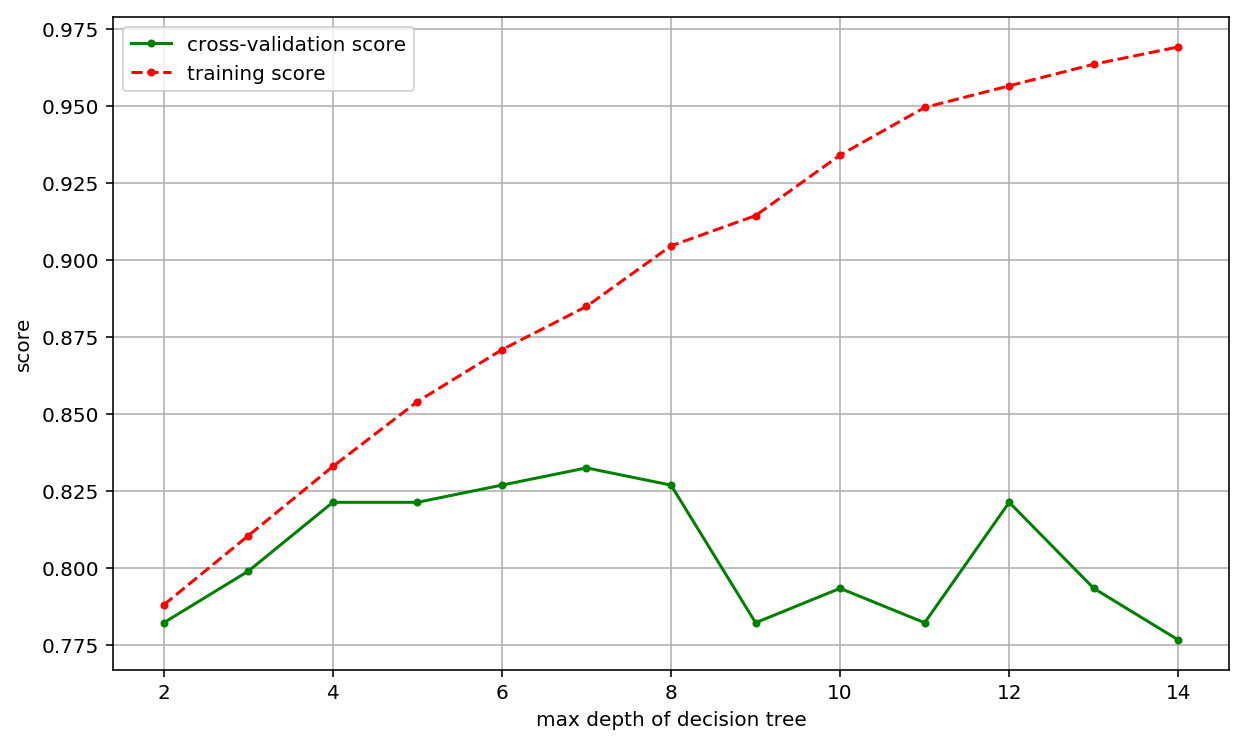

In [25]:
#画出模型参数和模型评分
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()  #生成网格
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, cv_scores, '.g-', label='cross-validation score')
plt.plot(depths, tr_scores, '.r--', label='training score')
plt.legend()

best param: 0.001326530612244898; best score: 0.8491620111731844


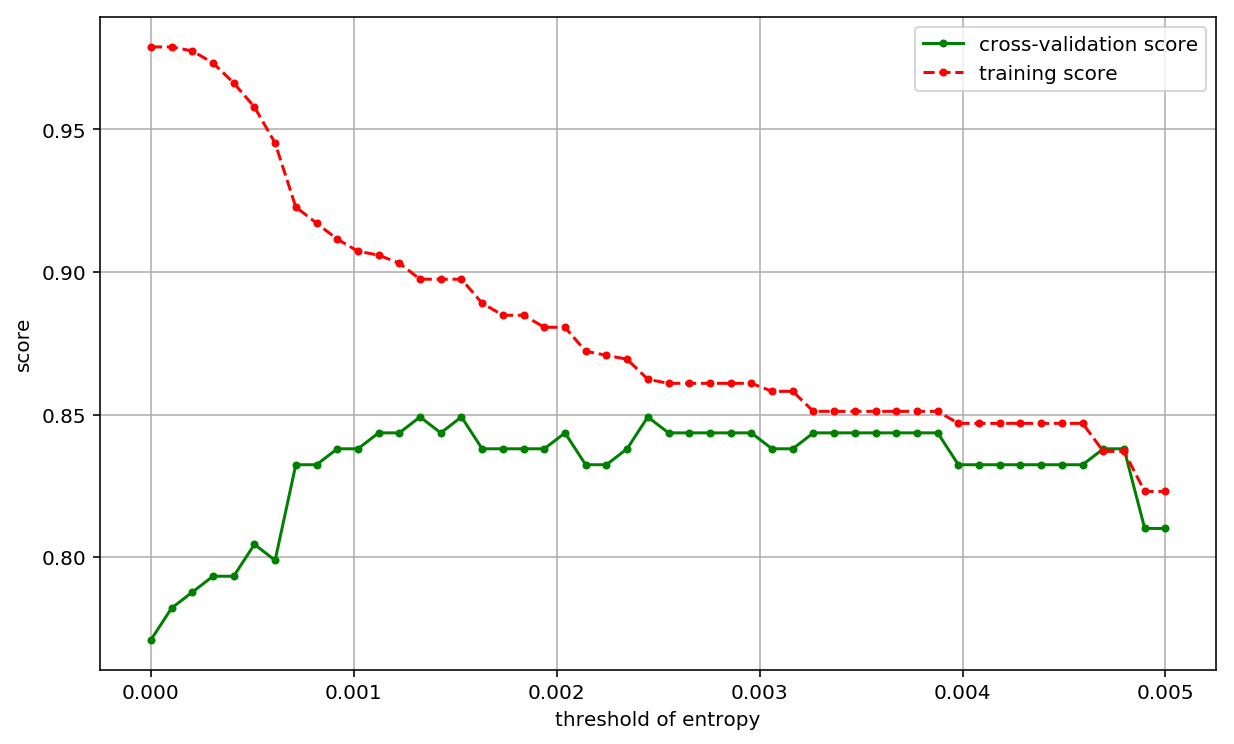

In [27]:
# 同样的方法，训练模型，考察节点划分最小不纯度
#criterion='gini'特征选择算法，一种基于信息熵，一种基于基尼不纯度
# min_impurity_decrease:节点划分最小不纯度，默认值为‘0’，限制决策树的增长，如果某节点的不纯度（基尼系数，信息增益，均方差，绝对差）小与这个阈值，则该节点不再生成子节点。
def cv_score(val):
    clf = DecisionTreeClassifier(criterion='gini', min_impurity_decrease=val)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

# 指定参数范围，分别训练模型，并计算评分
values = np.linspace(0, 0.005, 50)
scores = [cv_score(v) for v in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

# 找出评分最高的模型参数
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))

# 画出模型参数与模型评分的关系
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.plot(values, cv_scores, '.g-', label='cross-validation score')
plt.plot(values, tr_scores, '.r--', label='training score')
plt.legend()

以每个等分点作为信息增益阈值来训练一次模型，并计算模型评分数据。从图中可以看出，当阈值接近0.5时，模型的训练评分和测试评分都急剧下降，说明模型出现了欠拟合。

四、模型参数选择工具包

目前模型参数优化方法存在2个问题：数据不稳定（多次运行结果不同），不能一次选择多个参数（如max_depth和min_sample_leaf）
问题一：随机划分测试集和训练集造成，解决办法：多次计算求平均（多次划分数据集，多次训练模型，计算出这个参数值时的最低评分、最高评分及平均评分）
问题二：优化代码能够处理多个参数的组合
scikit-learn在sklearn.model_selection包里提供了大量的模型选择和评估的工具供我们使用，针对以上问题，可以使用GridSearchCV类来解决

In [29]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(10, 6), dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

best param: {'min_impurity_decrease': 0.0010204081632653062}
best score: 0.8148148148148148


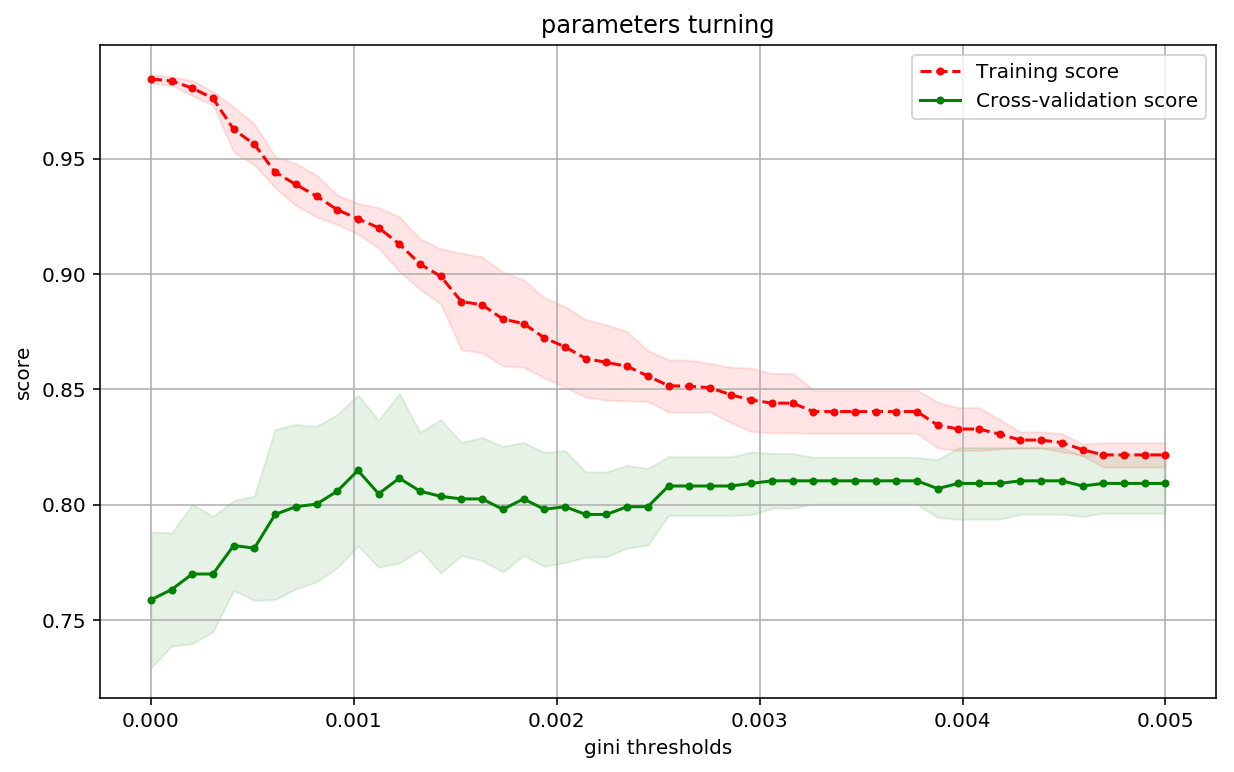

In [30]:
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0, 0.005, 50)
# Set the parameters by cross-validation
param_grid = {'min_impurity_decrease': thresholds}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

plot_curve(thresholds, clf.cv_results_, xlabel='gini thresholds')

In [32]:
#在多组参数之间选择最优参数
from sklearn.model_selection import GridSearchCV

entropy_thresholds = np.linspace(0, 0.01, 50)
gini_thresholds = np.linspace(0, 0.005, 50)

# Set the parameters by cross-validation
#param_grid是一个列表，列表中每个元素都是一个字典
#是否返回训练得分，如果“False”，cv_results_属性将不包括训练分数
param_grid = [{'criterion': ['entropy'], 
               'min_impurity_decrease': entropy_thresholds},
              {'criterion': ['gini'], 
               'min_impurity_decrease': gini_thresholds},
              {'max_depth': range(2, 10)},
              {'min_samples_split': range(2, 30, 2)}]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

best param: {'criterion': 'entropy', 'min_impurity_decrease': 0.0048979591836734691}
best score: 0.8226711560044894


In [53]:
from sklearn.tree import export_graphviz
clf = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.0048979591836734691)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

# 导出 titanic.dot 文件
with open("titanic.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)
    
# 1. 在电脑上安装 graphviz
# 2. 运行 `dot -Tpng titanic.dot -o titanic.png` 
# 3. 在当前目录查看生成的决策树 titanic.png

train score: 0.848314606741573; test score: 0.7988826815642458
